# Car Price Prediction Project

>With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in 
demand hence making them costly and some are not in demand hence cheaper. One of our clients works with 
small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems 
with their previous car price valuation machine learning models. So, they are looking for new machine learning 
models from new data. We have to make carprice valuation model.

#### Importing the required libraries.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('used_cars.csv') #importing the collected data

In [3]:
df

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
0,New Delhi,2012,Maruti,Ertiga VXI,Manual,"37,786 km",Petrol,1st Owner,"₹4,15,000"
1,New Delhi,2014,Ford,Ecosport 1.5 TREND TDCI,Manual,"47,562 km",Diesel,2nd Owner,"₹3,99,142"
2,New Delhi,2015,Honda,Mobilio 1.5 S I DTEC,Manual,"52,945 km",Diesel,1st Owner,"₹4,55,000"
3,New Delhi,2019,Toyota,Innova Crysta 2.4 VX 7 STR,Manual,"31,235 km",Diesel,1st Owner,"₹18,00,000"
4,New Delhi,2019,Maruti,Ertiga ZDI PLUS,Manual,"30,079 km",Diesel,1st Owner,"₹10,00,000"
...,...,...,...,...,...,...,...,...,...
14970,Ahmedabad,2019,Ford,Ecosport 1.5TITANIUM TDCI,Manual,"49,191 km",Diesel,1st Owner,"₹8,23,399"
14971,Ahmedabad,2016,Hyundai,Creta 1.6 SX CRDI,Manual,"1,32,350 km",Diesel,2nd Owner,"₹8,99,099"
14972,Ahmedabad,2018,Hyundai,Creta 1.6 SX AT PETROL,Manual,"27,656 km",Petrol,1st Owner,"₹13,19,599"
14973,Ahmedabad,2019,Honda,WR-V 1.5 i-DTEC VX MT,Manual,"62,086 km",Diesel,1st Owner,"₹7,72,299"


# EDA.
Starting the EDA with general play around with the data.

In [4]:
df.columns

Index(['LOCATION', 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'DRIVEN_KM',
       'FUELTYPE', 'NOOF_OWNERS', 'PRICE'],
      dtype='object')

In [5]:
df.LOCATION.unique()

array(['New Delhi', 'Noida', 'Gurgaon', 'Mumbai', 'Pune', 'Bengaluru',
       'Hyderabad', 'Chennai', 'Kolkata', 'Ahmedabad'], dtype=object)

In [6]:
df.MNF_YEAR.unique()

array([2012, 2014, 2015, 2019, 2017, 2016, 2013, 2018, 2020, 2021, 2008,
       2010, 2011, 2009, 2007], dtype=int64)

In [7]:
df.BRAND.unique()

array(['Maruti', 'Ford', 'Honda', 'Toyota', 'Mahindra', 'Renault', 'Tata',
       'Hyundai', 'Nissan', 'Mitsubishi', 'Ssangyong', 'Landrover',
       'Mercedes', 'Audi', 'BMW', 'Jeep', 'ISUZU', 'Volkswagen', 'Skoda',
       'Fiat', 'Chevrolet', 'Datsun', 'Jaguar'], dtype=object)

In [8]:
df.VARIANT.unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [9]:
df.NOOF_OWNERS.unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '5th Owner'],
      dtype=object)

In [10]:
df.duplicated().sum()

6667

In [11]:
df.isnull().sum()

LOCATION         0
MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT        727
DRIVEN_KM        0
FUELTYPE         0
NOOF_OWNERS      0
PRICE            0
dtype: int64

### Cleaning the Data.

#### Removing the Duplicate Records.

In [12]:
df = df.drop_duplicates() #Because we have too many duplicate records we will detete them to have a good model

In [13]:
df.isnull().sum() 

LOCATION         0
MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT        359
DRIVEN_KM        0
FUELTYPE         0
NOOF_OWNERS      0
PRICE            0
dtype: int64

From above we can see that the only in VARIANT we have values missing so we will change VARIANT nan values as NOT MENTIONED

### Mathematical/ Analytical Modeling of the Data

In [14]:
df['VARIANT'] = df['VARIANT'].fillna('NOT MENTIONED')

In [15]:
DF = df.copy()

In [16]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['LOCATION' , 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'FUELTYPE' , 'NOOF_OWNERS' ]

for i in catagorical_data:
    DF[i]=DF[i].astype('str')
    DF[i]=LE.fit_transform(DF[i])

In [17]:
DF['PRICE'] = DF['PRICE'].str.replace(r'\D', '').astype(int)
DF['DRIVEN_KM'] = DF['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

In [18]:
DF.describe()

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
count,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8.308000e+03
mean,5.484352,7.540804,11.785267,452.045378,0.932715,64489.278888,1.209798,0.284906,5.330477e+05
std,2.699218,2.853874,4.831691,270.636115,0.386262,41049.281410,1.038869,0.531949,3.327538e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,179.000000,0.000000,0.000000,9.916200e+04
25%,3.000000,5.000000,7.000000,220.000000,1.000000,33567.250000,0.000000,0.000000,3.210990e+05
50%,6.000000,8.000000,13.000000,445.000000,1.000000,58494.000000,2.000000,0.000000,4.369490e+05
75%,8.000000,10.000000,13.000000,682.000000,1.000000,87027.000000,2.000000,0.000000,6.437990e+05
max,9.000000,14.000000,22.000000,880.000000,2.000000,312882.000000,4.000000,4.000000,4.100000e+06


In [19]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8308 entries, 0 to 14974
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LOCATION     8308 non-null   int32
 1   MNF_YEAR     8308 non-null   int32
 2   BRAND        8308 non-null   int32
 3   MODEL        8308 non-null   int32
 4   VARIANT      8308 non-null   int32
 5   DRIVEN_KM    8308 non-null   int32
 6   FUELTYPE     8308 non-null   int32
 7   NOOF_OWNERS  8308 non-null   int32
 8   PRICE        8308 non-null   int32
dtypes: int32(9)
memory usage: 357.0 KB


### Correlation of the Data

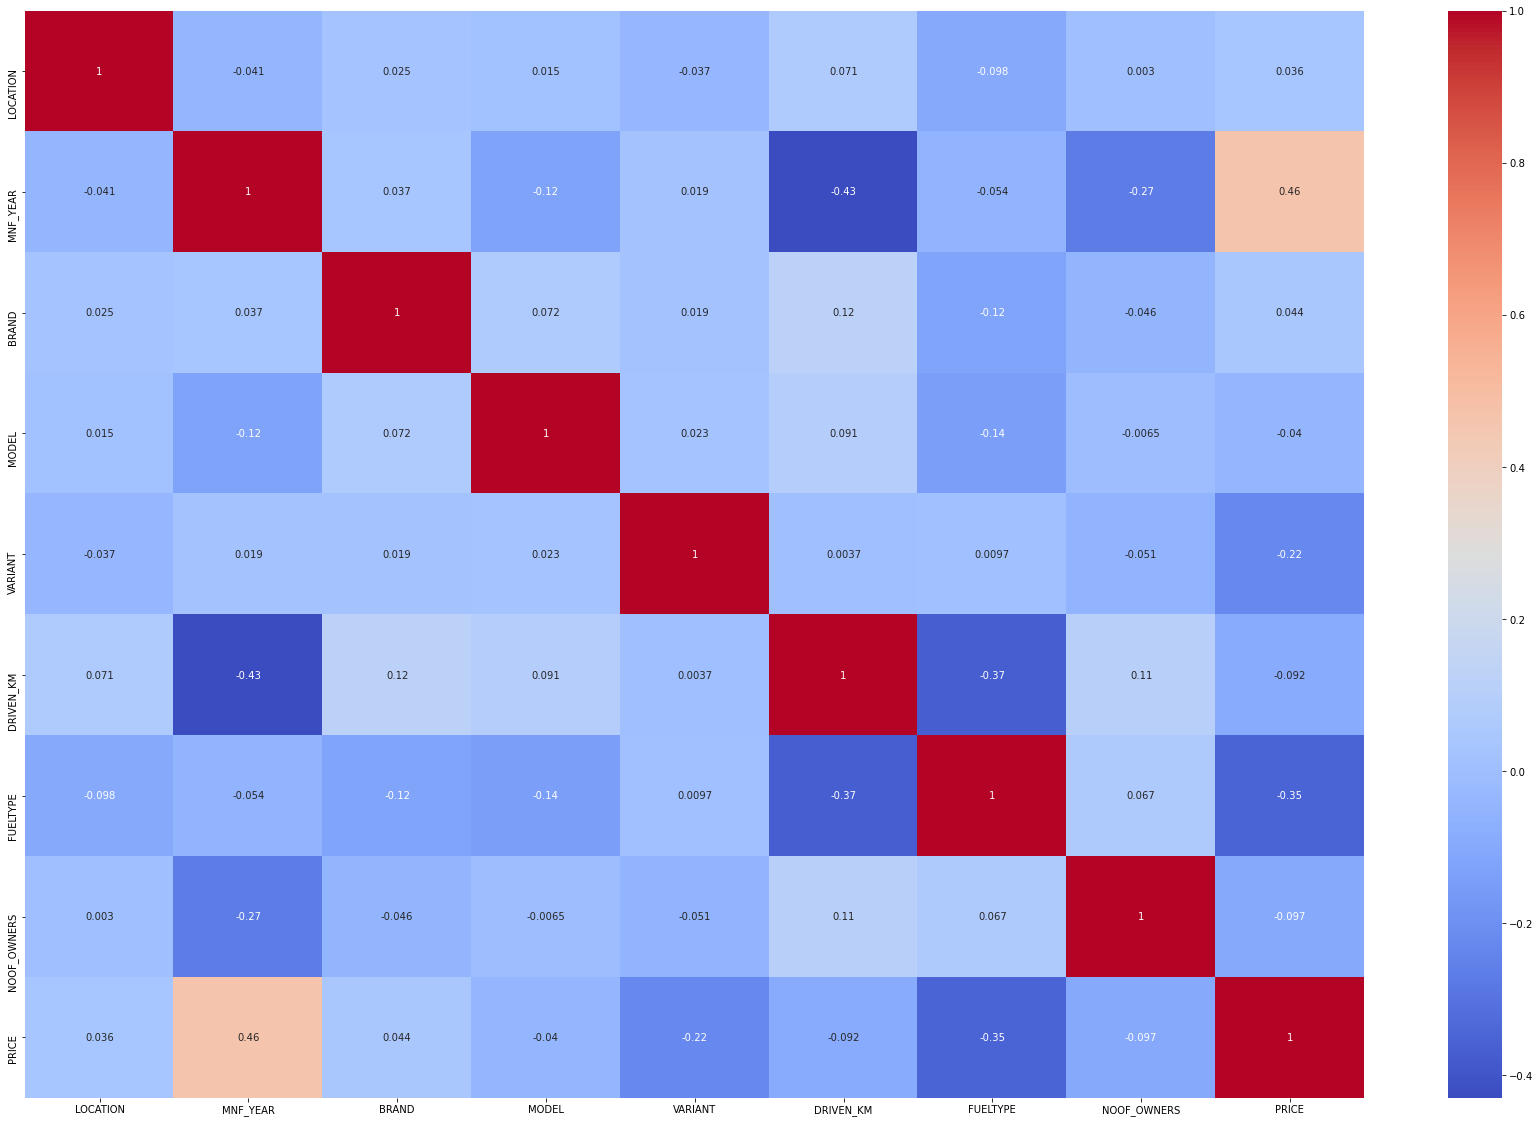

In [20]:
plt.figure(figsize=(30,20))
sns.heatmap(DF.corr(), annot = True, cmap= "coolwarm")
plt.show()

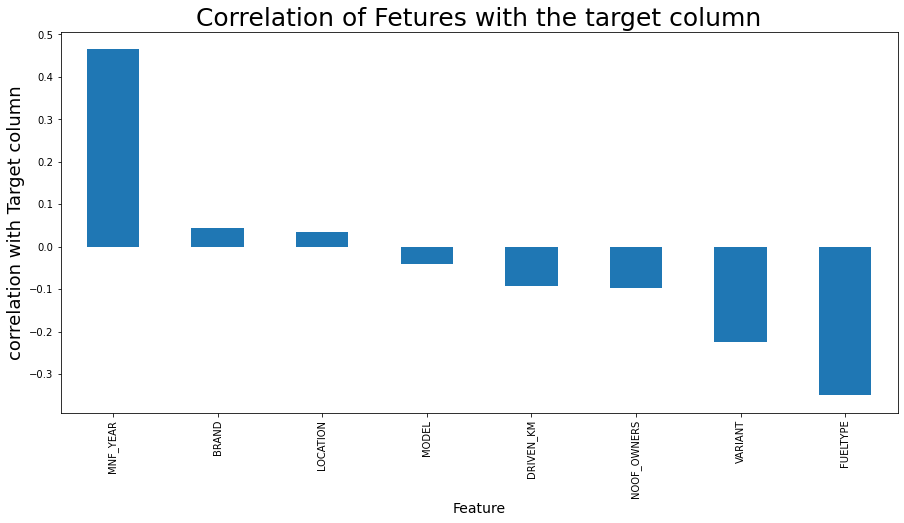

KEY OBSERVATIONS:
 


,PRICE
MNF_YEAR,0.464843
BRAND,0.044029
LOCATION,0.035546
MODEL,-0.039954
DRIVEN_KM,-0.092270
NOOF_OWNERS,-0.097283
VARIANT,-0.223530
FUELTYPE,-0.349668


In [21]:
plt.figure(figsize=(15,7))
DF.corr()["PRICE"].sort_values(ascending=False).drop(["PRICE"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(DF.corr()["PRICE"].sort_values(ascending=False)).drop(["PRICE"])
print("KEY OBSERVATIONS:\n ")
cor

### Key Observations:
   1. From above we can clearly see that MNF_YEAR is postivly correlated to PRICE and FUEL_TYPE and VARIENT is negative corelated to PRICE

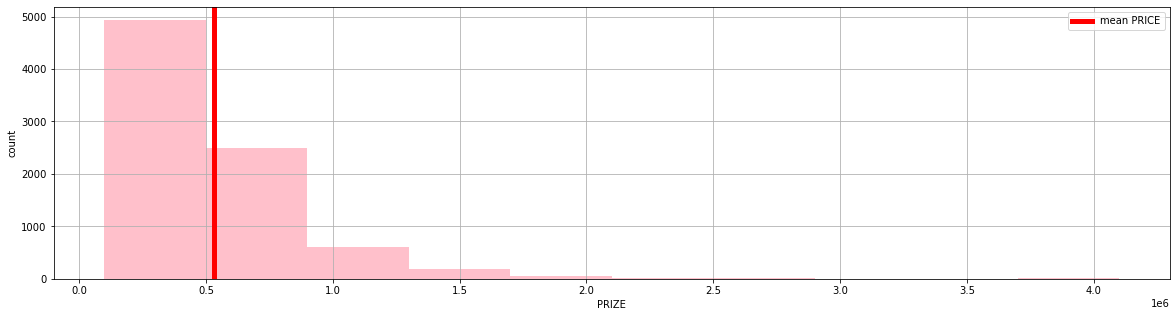

MATHEMATICAL SUMMARY OF PRIZE :
 count    8.308000e+03
mean     5.330477e+05
std      3.327538e+05
min      9.916200e+04
25%      3.210990e+05
50%      4.369490e+05
75%      6.437990e+05
max      4.100000e+06
Name: PRICE, dtype: float64


In [22]:
DF.PRICE.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.PRICE), linewidth = 5, color = "red", label = "mean PRICE")
plt.xlabel("PRIZE")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.PRICE.describe())

### Key observations:
1. Mean of the prize is Rs: 5,33,047, the prize is distributed between Rs: 99,162 to Rs: 41,00,000.
2. Above we can understand that most of the Car price is leser than the Mean i.e Rs: 5,33,047. 

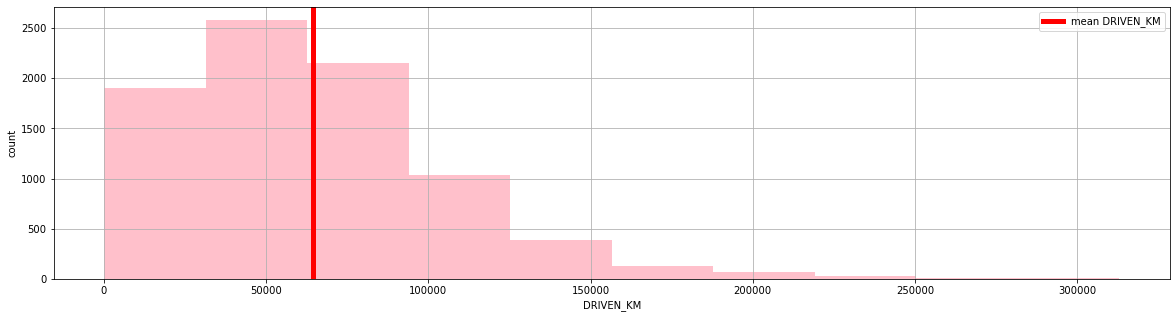

MATHEMATICAL SUMMARY OF PRIZE :
 count      8308.000000
mean      64489.278888
std       41049.281410
min         179.000000
25%       33567.250000
50%       58494.000000
75%       87027.000000
max      312882.000000
Name: DRIVEN_KM, dtype: float64


In [23]:
DF.DRIVEN_KM.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.DRIVEN_KM), linewidth = 5, color = "red", label = "mean DRIVEN_KM")
plt.xlabel("DRIVEN_KM")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.DRIVEN_KM.describe())

### Key observations:
1. Mean of the DRIVEN_KM is 64489.278888kms and the maximum KMS driven is  312882kms.
2. Above we can understand that most of the Car comes to sellimg arround low kilometers driven.

### Multivariate Analysis:

In [24]:
DF1 = df.copy()

In [25]:
DF1['PRICE'] = DF1['PRICE'].str.replace(r'\D', '').astype(int)
DF1['DRIVEN_KM'] = DF1['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

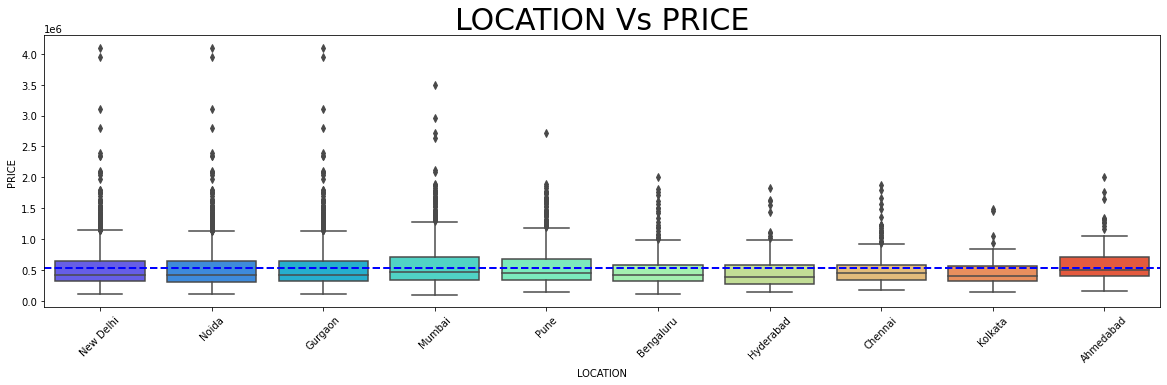

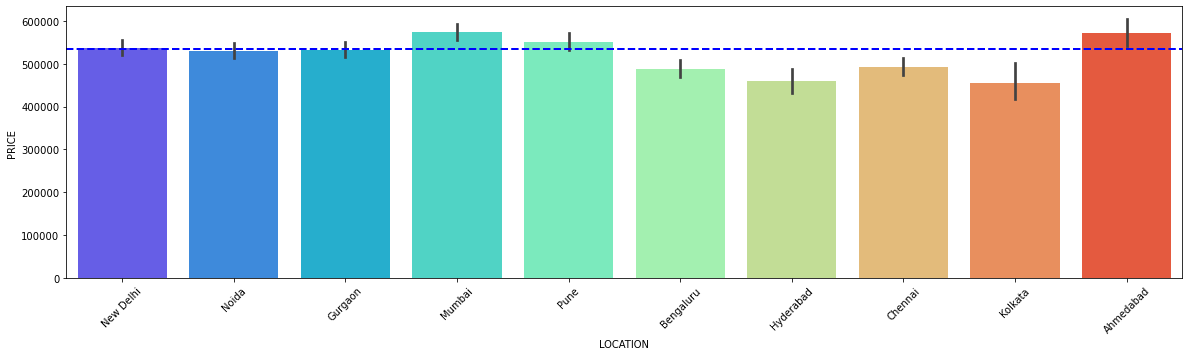

In [26]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "LOCATION",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("LOCATION Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "LOCATION",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. New Delhi, Noida, Gurgaon have the costiliest cars and Mumbai, Pune, Ahmedabad have most cars being sold.
2. We have Bengaluru, Hyderabad, Chennai, Kolkata have least cars being sold and also comprativly cheaper. 

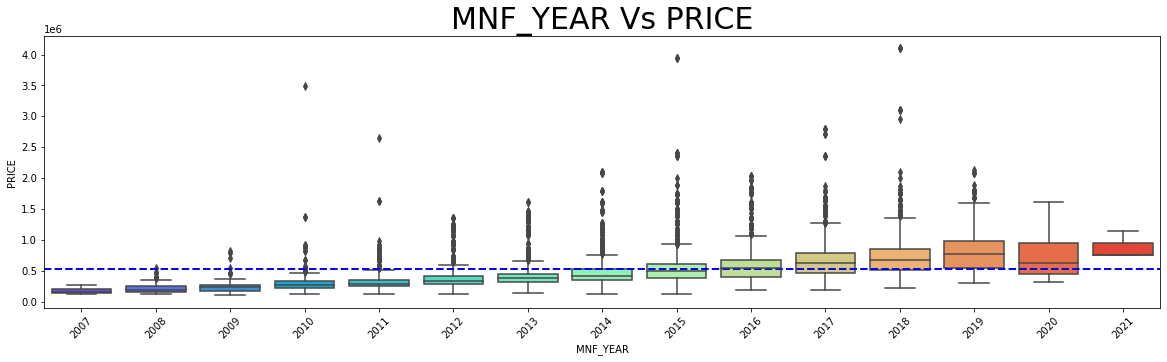

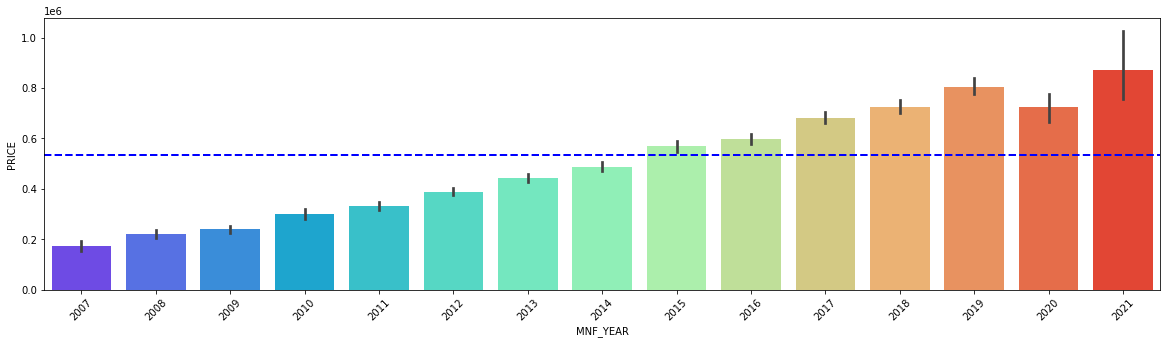

In [27]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("MNF_YEAR Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. 2019, 2020, 2021 model are being sold higher in PRICE and also above average PRICE.
2. Above we can understand thatcars sold in lesser kms driven and also in lesser years used are sold in high price.

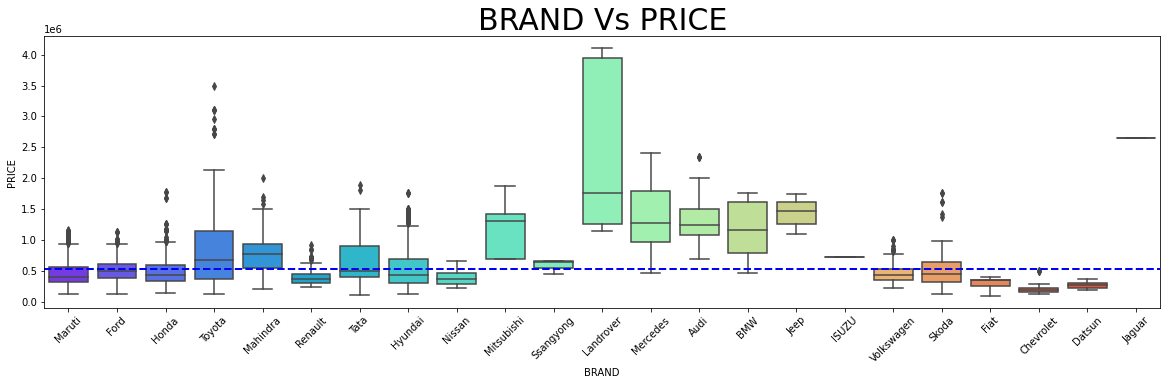

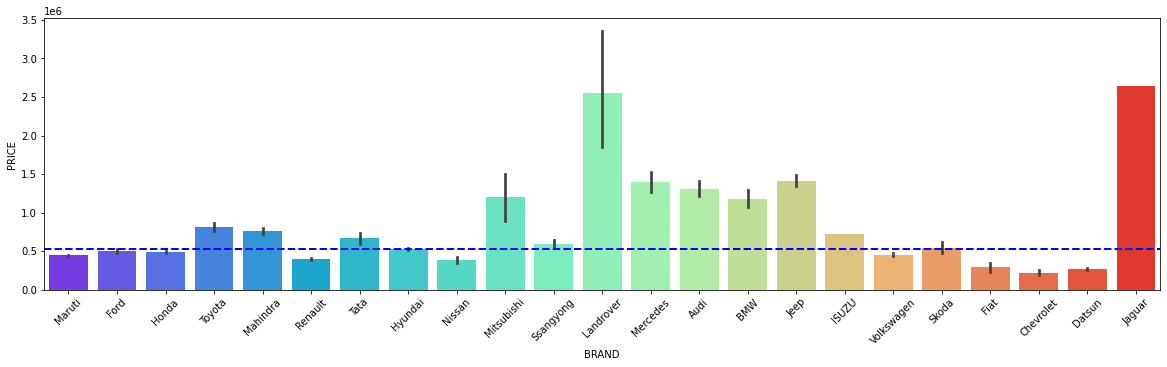

In [28]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("BRAND Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. When comes to the Brand Land rover are being the costliest in country followed by Jaguar
2. And most of the other brands including most of the foreign brands are below the PRICE mean line

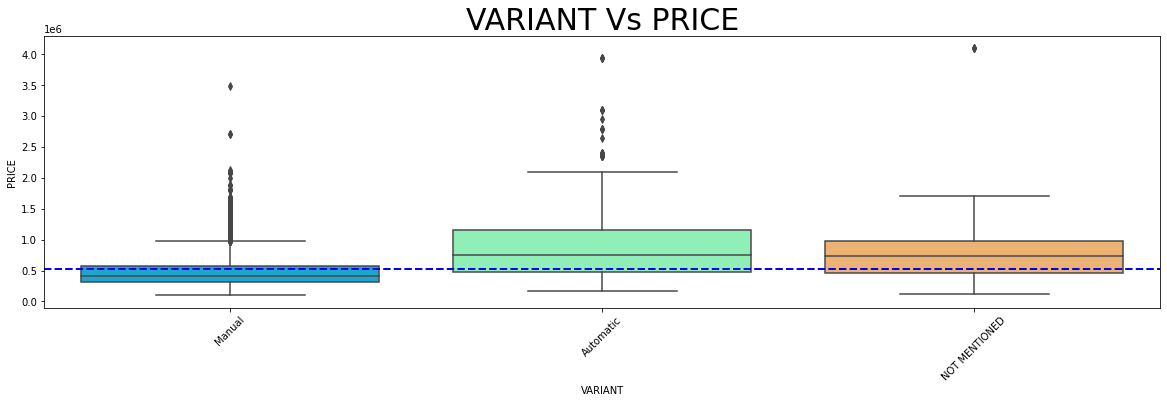

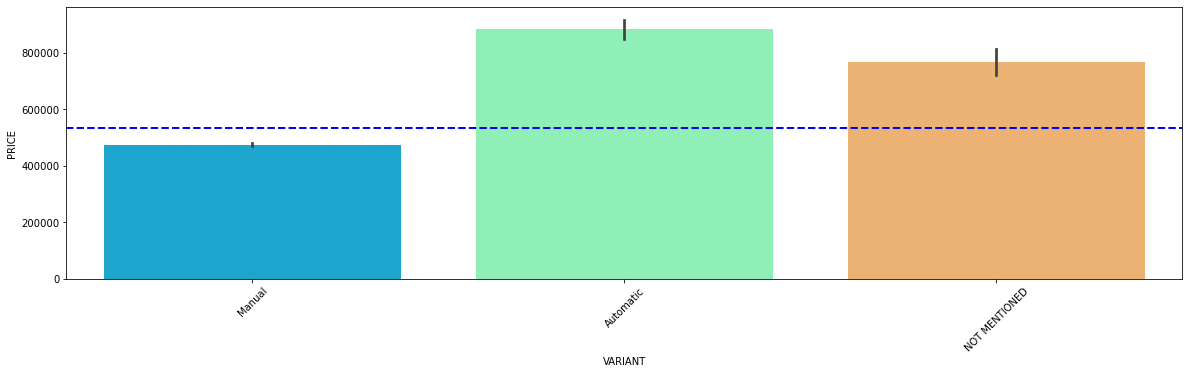

In [29]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("VARIANT Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. We can see that the automatic engines are costliest in the market. And also most costilier cars comes in Automatic Drift.

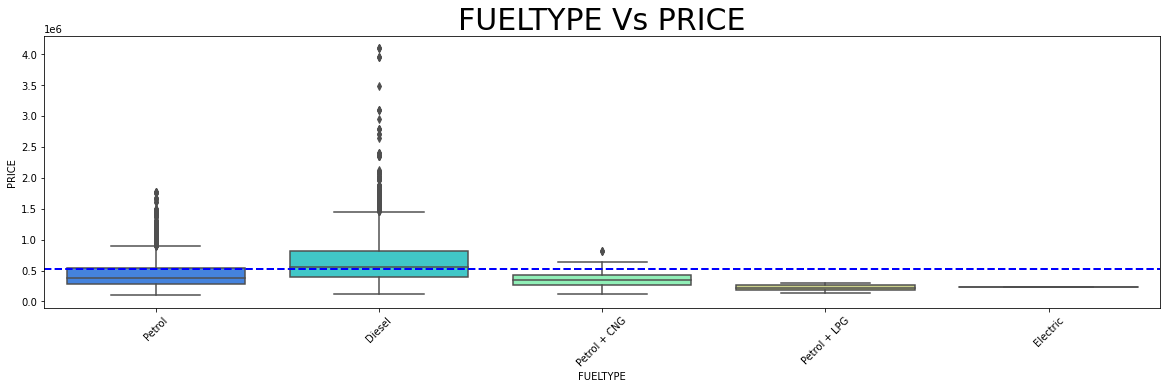

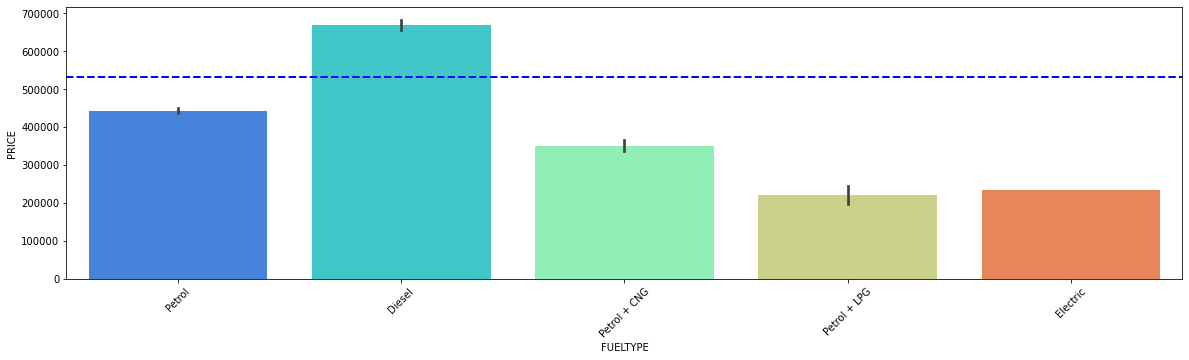

In [30]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("FUELTYPE Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observations:
1. Diesel being the chepeast and most efficient fuel type, and so the Desiel engines are being the costiliest fuel types.
2. Petrol bend second prefered followed by CNG and LPG fuel types.

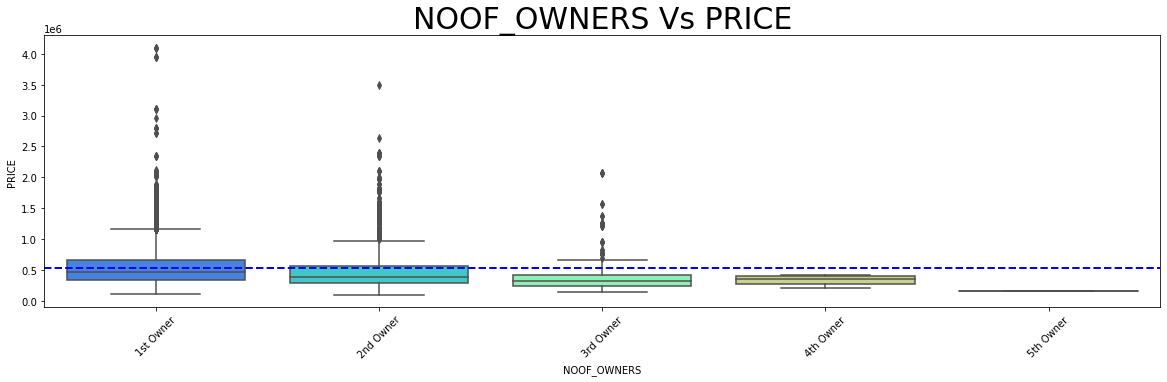

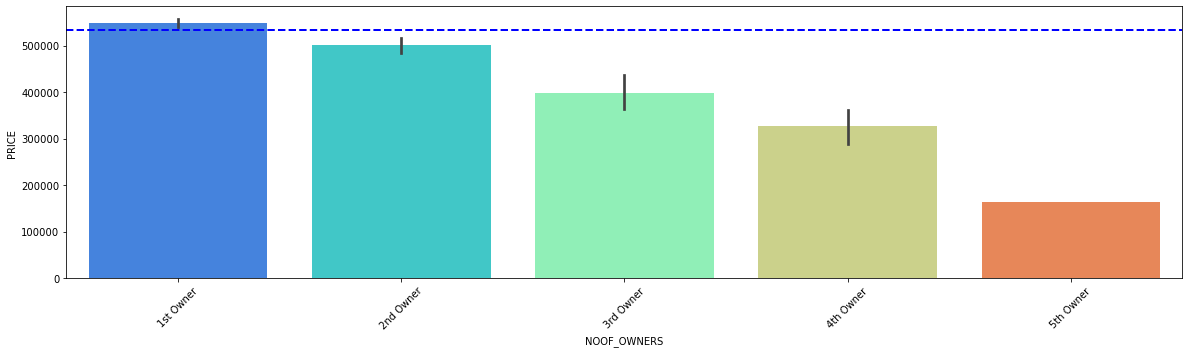

In [31]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "NOOF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("NOOF_OWNERS Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "NOOF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

### Key observation:
1. 1st owner cars are costilest followed by second and third. 


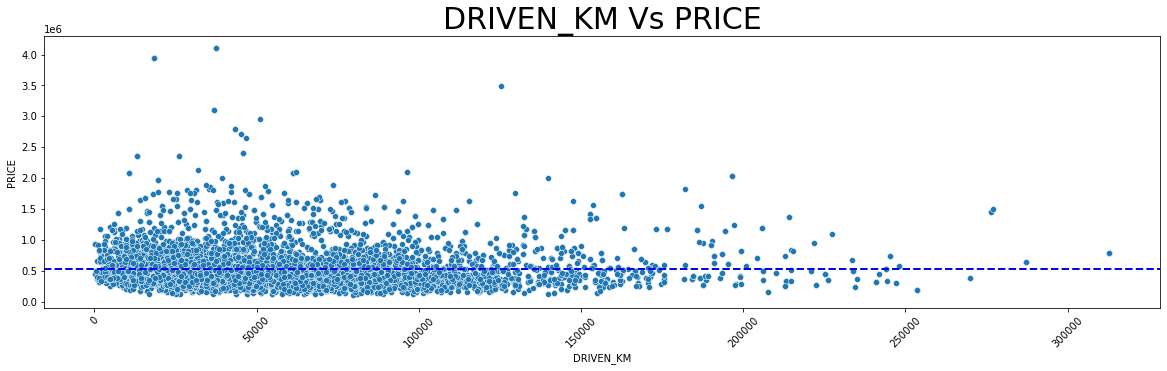

In [32]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.scatterplot(x = 'DRIVEN_KM',y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("DRIVEN_KM Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

### Key Observations:
1. The lesser kms driven are evidently sold costilier. 

## Data Pre-Processing.

### Lets observe the skewness and outliers in the Data.

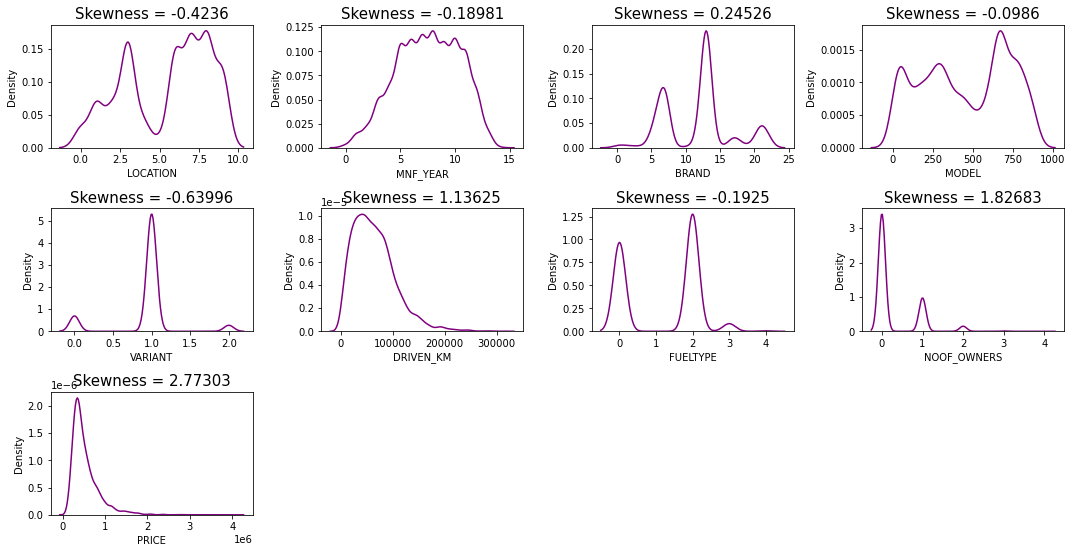

In [33]:
plt.figure(figsize=(15,15))
for i in range (0, len(DF.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(DF[DF.columns[i]], color = "purple")
    plt.title(f"Skewness = {round(DF[DF.columns[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

Lets also see the Outliers mathematically.

In [34]:
from scipy.stats import zscore

z= np.abs(zscore(DF))
threshold= 3
df_new = DF[(z < 3).all(axis=1)]

In [35]:
print(f"Orginal Data {DF.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((8308-7765)/8308)*100}%")

Orginal Data (8308, 9)
After Removing outliers (7765, 9)
The percentage of data loss 6.535869041887338%


We have many outliers and we also have skewness in the data. Because its more, correcting them will have loss in the data orr data will be deformed. So we are deciding to work with the same.

In [36]:
x_1=DF.drop(["PRICE"], axis = 1)
y_1=DF.PRICE

In [37]:
x_1

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS
0,7,5,13,324,1,37786,2,0
1,7,7,5,276,1,47562,0,1
2,7,8,6,502,1,52945,0,0
3,7,12,21,444,1,31235,0,0
4,7,12,13,329,1,30079,0,0
...,...,...,...,...,...,...,...,...
14970,0,12,5,280,1,49191,0,0
14971,0,9,7,228,1,132350,0,1
14972,0,11,7,227,1,27656,2,0
14973,0,12,6,784,1,62086,0,0


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x_1)

###  Model Building


### Selecting parameters for training

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 43.177105563519255 found on randomstate 845


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

### Shortlisting the best model

In [42]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [43]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.3595491143701388

ERROR:
MEAN ABSOLUTE ERROR:  166956.39465409378
MEAN SQUARED ERROR:  59253176564.77635
ROOT MEAN SQUARED ERROR : 243419.75385078415
R2 SCORE:  0.4317710556351926
**********************************************************************************************************



Score of Lasso() is: 0.359549114292796

ERROR:
MEAN ABSOLUTE ERROR:  166955.8919531636
MEAN SQUARED ERROR:  59253158493.965034
ROOT MEAN SQUARED ERROR : 243419.71673216004
R2 SCORE:  0.43177122893152264
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.3595491047016057

ERROR:
MEAN ABSOLUTE ERROR:  166950.3633512003
MEAN SQUARED ERROR:  59253562829.02142
ROOT MEAN SQUARED ERROR : 243420.54726136292
R2 SCORE:  0.43176735141987543
**********************************************************************************************************



Score of ElasticNet() is: 

In [47]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [0.34409609 0.30402271 0.35713837 0.46251028 0.30606032]
MEAN OF SCORE is : 0.3547655554045179
Standard Deviation : 0.057750204082363185
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [0.34409533 0.30402166 0.35713938 0.46251102 0.30607081]
MEAN OF SCORE is : 0.3547676409213508
Standard Deviation : 0.05774893094911735
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [0.34409042 0.3040067  0.35714352 0.46250934 0.30614879]
MEAN OF SCORE is : 0.3547797515008221
Standard Deviation : 0.05773800555317702
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.29760737 0.24596304 0.32735488 0.41027094 0.3867089 ]
MEAN OF SCOR

In [48]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
8,RandomForestRegressor,0.987867,0.885428,0.073520,43171.462845,6.053535e+09,77804.466441,0.941948
6,DecisionTreeRegressor,1.000000,0.829060,0.144769,41483.395282,9.687093e+09,98423.031742,0.907102
5,KNeighborsRegressor,0.756784,0.559943,0.088061,113896.904478,3.742550e+10,193456.702505,0.641095
2,Ridge,0.359549,0.354780,0.057738,166950.363351,5.925356e+10,243420.547261,0.431767
1,Lasso,0.359549,0.354768,0.057749,166955.891953,5.925316e+10,243419.716732,0.431771
0,LinearRegression,0.359549,0.354766,0.057750,166956.394654,5.925318e+10,243419.753851,0.431771
3,ElasticNet,0.320208,0.333581,0.059521,168596.274304,6.462592e+10,254216.279990,0.380247
7,AdaBoostRegressor,0.326762,0.173676,0.281396,224872.049882,7.322872e+10,270608.056643,0.297748
4,SVR,-0.081421,-0.086992,0.038757,220444.917837,1.138233e+11,337377.115794,-0.091548


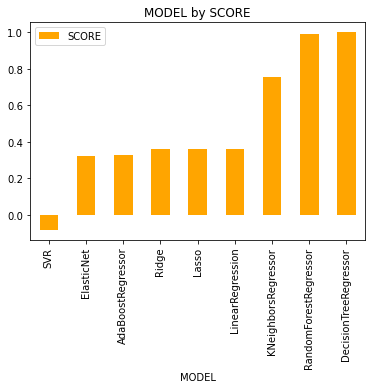

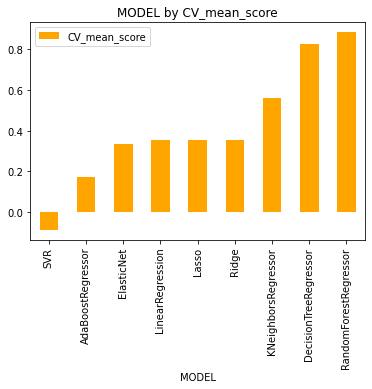

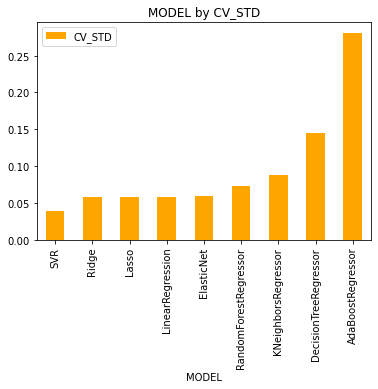

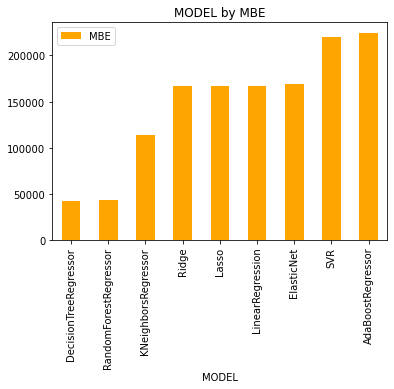

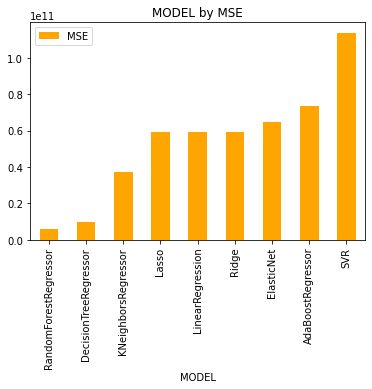

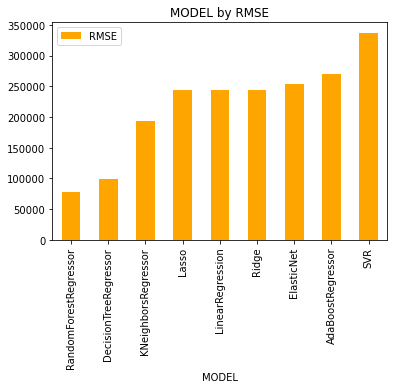

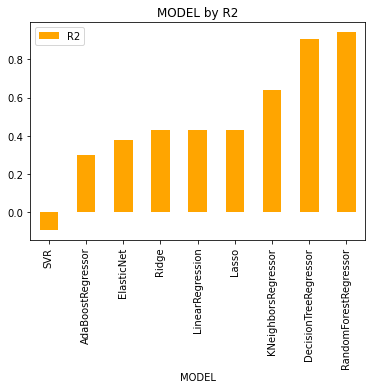

In [49]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

From above observation, we can come to a conclusion that Randomforest is the best model with Score of 98.78 lets try in Hyper tuning the same for improved performance and also to reduce the over fitting the Data.

In [50]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

532178.1967404912

In [51]:
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [52]:
predm=rf.predict(x_test)

In [53]:
predm

array([ 263895.02, 1035371.58,  409008.29, ...,  257055.54,  282553.01,
        322870.67])

In [54]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.9419475207728788, 0.9878671962787907)

In [55]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Model Evaluation

### Hyper Parameter Tuning.

In [56]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [57]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}],
             verbose=2)

In [58]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mae', max_features='log2',
                      random_state=42)

In [59]:
reg_final_model = grid_search.best_estimator_

In [60]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mae', max_features='log2',
                      random_state=42)

In [62]:
grid_search.best_score_

0.8870863782473982

In [63]:
reg_final_model.score(x_train_1,y_train_1), reg_final_model.score(x_test_1,y_test_1)

(0.9905835701200265, 0.9892013597142346)

#### Saving the final model

In [61]:
import joblib
joblib.dump(reg_final_model,"CARPRICE_PRED.obj")

['CARPRICE_PRED.obj']

### Summary and Conclusion : 

> We have Hyper parameter tuned the model and improved the model score upto 99% with the Grid search cv score of 88.70%

1. The above model will help our seller to predict the Price of the user cars, and also will helps him to understand based on what factors the the Car Price is decided.